## Calculating Surface Roughness

This notebook demonstrates how to open a Nanosurf image file (*.nid) and calculate the roughness parameters of the surface.

In [1]:
# import required modules
from NSFopen.read import read

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the data
data_file = "sapphire.nid"
afm = read(data_file)
data = afm.data

In [3]:
# a function to flatten the image
def flatten(data, order=1):
    data_out = np.copy(data)  # create copy of data
    for idx, line in enumerate(data_out):
        x = np.arange(len(line))
        p = np.polyfit(x, line, order)  # fit data to polynomial
        y = np.polyval(p, x)
        data_out[idx] = line - y  # subtract fit from data
    return data_out

In [4]:
Zaxis = data['Image']['Forward']['Z-Axis'] * 1e12  # height data scaled to picometers

Zaxis_ = flatten(Zaxis, order=1)  # flatten data with 1st order polynomial (i.e. line)

In [5]:
# calculate a number of surface parameters such as Sa, Sq, Skew and Kurtosis
# definition of central moment
def Mu(x, i):
    return np.mean((x-x.mean())**i)

# mean deviation
def Sa_(x):
    return np.mean(np.abs(x-x.mean()))

# RMS deviation
def Sq_(x):
    return np.sqrt(Mu(x, 2))

# Skew
def skew_(x):
    return Mu(x, 3)/Mu(x, 2)**(3./2.)

# Kurtosis
def kurt_(x):
    return Mu(x, 4)/Mu(x, 2)**2 - 3

Sa = Sa_(Zaxis_)
Sq = Sq_(Zaxis_)
skew = skew_(Zaxis_)
kurt = kurt_(Zaxis_)

textstr = '\n'.join((
    r'RMS (Sq): %5.1f pm' % (Sq, ),
    r'Mean (Sa): %5.1f pm' % (Sa, ),
    r'Skew (Ssk): %5.3f' % (skew, ),
    r'Kurtosis (Sku): %5.3f' % (kurt, )))

print(textstr)

RMS (Sq):  42.1 pm
Mean (Sa):  33.6 pm
Skew (Ssk): -0.056
Kurtosis (Sku): 0.010


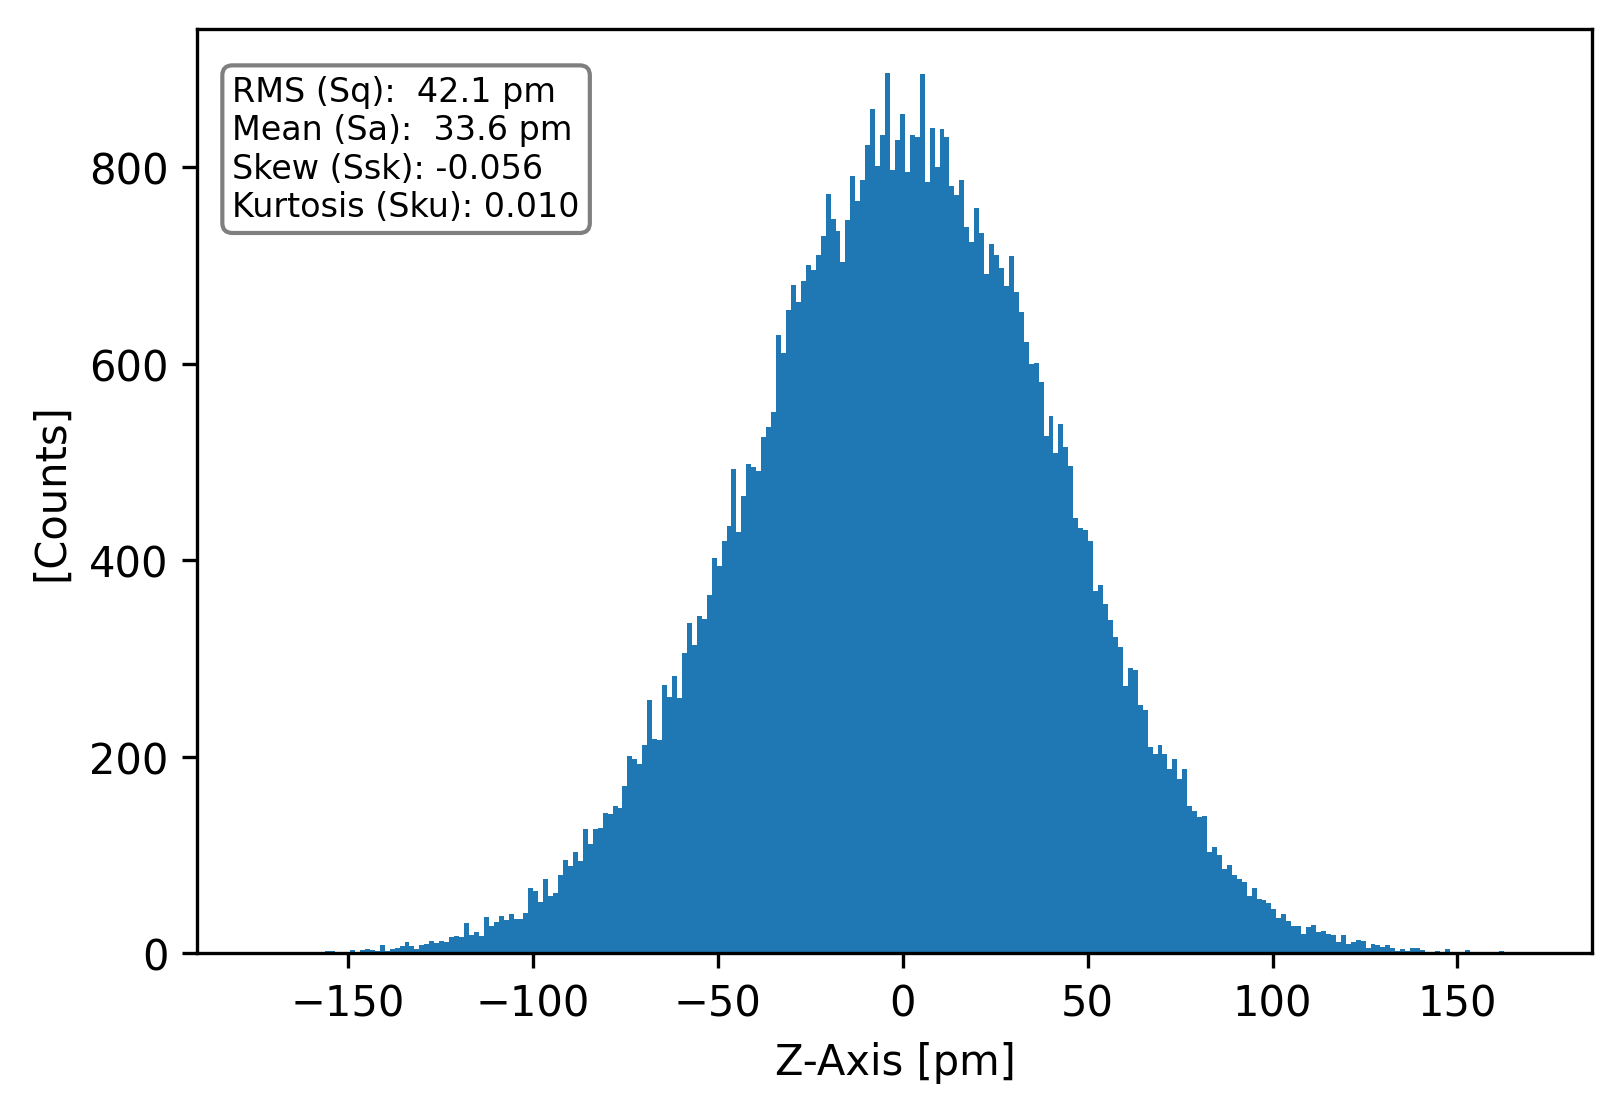

In [6]:
fig, ax = plt.subplots(1, figsize=(6,4), dpi=300)

plt.hist(Zaxis_.flatten(), bins = 256);  # this flatten is the numpy function that converts a 2D array to 1D

props = dict(boxstyle='round', facecolor='w', alpha=0.5)
plt.text(0.025, 0.95, textstr, verticalalignment = 'top',
         transform = ax.transAxes, fontsize=8, bbox = props)

plt.xlabel('Z-Axis [pm]');
plt.ylabel('[Counts]');

plt.show()